# Demension reduction

In [14]:
import re
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [2]:
df_train = pd.read_csv("train.csv",header=None)
df_test = pd.read_csv("test.csv",header=None)

In [126]:
X_train = df_train.values[:,:-1]
X_test = df_test.values[:,1:]
Y_train = df_train.values[:,-1]
ID_test = df_test.values[:,0]

In [127]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(ID_test.shape)

(6325, 88200)
(1000, 88200)
(6325,)
(1000,)


# Extract features--CQT

In [285]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES
hz = list(range(5121))

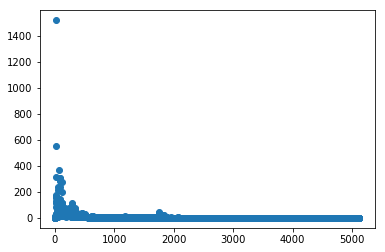

In [288]:
var = np.var(np.abs(librosa.stft(X_train[0], n_fft=10240)), axis=1).real
plt.scatter(hz,var)
plt.show()

In [267]:
X_train_stft_more = []
for i in range(len(X_train)):
    X_train_stft_more.append(np.mean(np.abs(librosa.stft(X_train[i], n_fft=10240)), axis=1).real)

In [268]:
X_test_stft_more = []
for i in range(len(X_test)):
    X_test_stft_more.append(np.mean(np.abs(librosa.stft(X_test[i], n_fft=10240)), axis=1).real)

In [269]:
np.savetxt("X_train_stft_more.csv", X_train_stft_more, delimiter=",")

KeyboardInterrupt: 

In [ ]:
np.savetxt("X_test_stft_more.csv", X_test_stft_more, delimiter=",")

In [251]:
X_train_stft = []
for i in range(len(X_train)):
    X_train_stft.append(np.mean(np.abs(librosa.stft(X_train[i])), axis=1).real)

In [252]:
X_test_stft = []
for i in range(len(X_test)):
    X_test_stft.append(np.mean(np.abs(librosa.stft(X_test[i])), axis=1).real)

In [253]:
np.savetxt("X_train_stft.csv", X_train_stft, delimiter=",")

In [254]:
np.savetxt("X_test_stft.csv", X_test_stft, delimiter=",")

In [232]:
X_train_hz = []
for i in range(len(X_train)):
    Q = librosa.cqt(y=X_train[i], sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    X_train_hz.append(np.mean(Q, 1).real)

In [233]:
X_test_hz = []
for i in range(len(X_test)):
    Q = librosa.cqt(y=X_test[i], sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    X_test_hz.append(np.mean(Q, 1).real)

In [234]:
np.savetxt("X_train_hz.csv", X_train_hz, delimiter=",")

In [235]:
np.savetxt("X_test_hz.csv", X_test_hz, delimiter=",")

In [209]:
X_train_cqt = []
for i in range(len(X_train)):
    Q = librosa.cqt(y=X_train[i], sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    X_train_cqt.append(np.ndarray.flatten(Q).real)

In [210]:
X_test_cqt = []
for i in range(len(X_test)):
    Q = librosa.cqt(y=X_test[i], sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    X_test_cqt.append(np.ndarray.flatten(Q).real)

In [211]:
np.savetxt("X_train_cqt_less.csv", X_train_cqt, delimiter=",")

In [212]:
np.savetxt("X_test_cqt_less.csv", X_test_cqt, delimiter=",")

In [156]:
np.savetxt("Y_train.csv", Y_train, delimiter=",")

In [216]:
np.savetxt("ID_test.csv", IDtest, delimiter=",")

# fit the models

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X_train_cqt, Y_train, test_size=0.20)

### logistic

In [89]:
from sklearn.linear_model import LogisticRegressionCV

In [236]:
logi = LogisticRegressionCV()
logi.fit(X_train_hz, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [237]:
logi_pred = logi.predict(X_test_hz)

In [238]:
write_predictions(logi_pred,IDtest,"logi_hz.csv")

### neural net

In [158]:
from sklearn.neural_network import MLPClassifier

In [270]:
NN = MLPClassifier()
NN.fit(X_train_stft_more, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [271]:
NN_pred = NN.predict(X_test_stft_more)

In [272]:
write_predictions(NN_pred,IDtest,"NN_stft_more.csv")

### Random forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
# fit the model
RF = RandomForestClassifier()
RF.fit(X_train_stft_more, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [274]:
RF_pred = RF.predict(X_test_stft_more)

In [275]:
write_predictions(RF_pred,IDtest,"RF_stft_more.csv")

In [180]:
IDtest = []
for ID in ID_test:
    IDtest.append(int(ID))

In [194]:
from sklearn.ensemble import ExtraTreesClassifier

In [195]:
ET = ExtraTreesClassifier(n_estimators=30)
ET.fit(X_train_cqt, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [196]:
ET_pred = ET.predict(X_test_cqt)

In [198]:
write_predictions(ET_pred,IDtest,"ET.csv")

# write to file

In [98]:
logi_test = wlogi_ovr.predict(X_test_cqt)

In [108]:
def write_predictions(predictions, ids, outfile):
    """
    assumes len(predictions) == len(ids), and that predictions[i] is the
    index of the predicted class with the malware_classes list above for
    the executable corresponding to ids[i].
    outfile will be overwritten
    """
    with open(outfile,"w+") as f:
        # write header
        f.write("Id,Prediction\n")
        for i, history_id in enumerate(ids):
            f.write("%s,%d\n" % (history_id, predictions[i]))

In [109]:
write_predictions(logi_test,id_test,"logi_cqt.csv")

In [110]:
len(id_test)

999